<a href="https://colab.research.google.com/github/SandhyaKshirsagar/ML-Practice-Projects/blob/main/Stock_price_prediction_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock price prediction **is done by Time series forcasting.
##Time Series Analysis and Forcasting
Basic Terminology;
* Component: (Trend, seasonality, irregular, cyclicity)
* AR, MA, Difference(lag), ARIMA
* Fouriesr Series
* Stationary vs Non-Stationary in ML, DL and Automation

Time Series Forcasting applications:

In medical domain, heart rate prediction. In e-comm items sold per hour, sales forcasting, revenue preiction. In companies such as ola and uber, cabs required per 10 mins, time required for cab to arrive, cost estimate for the travel.

Why Forecast: Every business operates under risk and uncertainity. Forcasting would predict the output to minimize the risk and.

In Time series forcasting there are 4 components
1. Trend: Data given is more than one year is a trend data.
2. Seasonality
3. Cyclic Pattern
4. Irregular (Noise)

Steps to follow for Times Series Forecasting:
1. Missing data should be fixed by imputation only
2. Sequence order is important in the data. It can be handled using imputation. The order is always in ascending onrder.
3. Rows are not independent
4. Date and variable prediction
5. MAndatory: Data should be staionary (Mean constant over time, variance should be constant, covariance is only a function of gap)

**Time series data:** When data keeps changing over time

**Panel data:** There is a fixed range for the data

**Cross Sectional Data:** Data representing information of one particular subject or person. For example, attrition data.

**Naive Data:** Data that does not have any context or we dont know where the data came from.

To check if time series data is stationary or not:

Augmented Dickey Fuller Test(ADF)
Hypothesis Testing. If p value is less than 0.05 then data is stationary if p-value is greater than 0.05 its not stationary.

Auto Regressive model: Its like a linear regression on previous p value in the series

ARIMA: Auto Regression Integrated Moving Average. It is also called Box Jenkins model.

AR - p: Partial Auto correlation
I - d: Integrated Differencing
MA - q: Moving Average

pdq is the hyper parameter.

Differencing function (lag function): It is one of the strategies to make the time series data stationary.

**Problem Statement:** Stock price for Tata Motors.
Open and Close price is given. Customer wants to understand the future stock price behaviour. For this,
Split the data into train test split and build the model and forcast data on the test set based on the time stamp.
Forcast for the stock price based on the time stamp.

### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series


### Reading the data set

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects with Sundram/Stock Price Prediction/TATAMOTORS.NS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
1,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
3,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
4,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395996,9232656.0


### Understanding the data
* Open and Close: Opening and Closing value of the stock on that particular date.
* Adjusted Close: It represents the closing price. The discrepencies in the close value is adjusted using the Adj Close value.
* High and Low: Represents the highest and lowest trading values for that particular date.
* Volume: Represents the total number of share that are traded in that particular trading session.

###Pre-requisite rule in TSF
1. Ensure all the data are represented as numerical, rather than categorical labels or text
2. Verify the correct data types for each coluns, ensuring that datetime columns and the target variable are numeric
3. Check for any missing data points, if any are found fill them in using an appropriate imputation method before proceeding with TSF
4. Arrange the data in sequential order, with timestamps or indices sorted in ascending order
5. Assess the data for the presence of trend, seasonality, errors or any sudden unexpected changes.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2360 non-null   object 
 1   Open       2359 non-null   float64
 2   High       2359 non-null   float64
 3   Low        2359 non-null   float64
 4   Close      2359 non-null   float64
 5   Adj Close  2359 non-null   float64
 6   Volume     2359 non-null   float64
dtypes: float64(6), object(1)
memory usage: 129.2+ KB


The data info shows that one record is missing and the Date feature is of object type.

1. There is some missing data. As its only one record and upon investigating, it shows that that record is of Feb 28th which was on a Saturday. As there is no trading on saturday, its safe to drop that record.
2. Date field is object type, it should be converted to numerical format

### Converting Date to Datetime format

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2360 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 129.2 KB


### Checking for duplicate data

In [ ]:
data.duplicated().sum()

0

### Checking for missing data

In [ ]:

data.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [ ]:
# dropping the null row as the data was registered on. saturday 28 feb, so we can delete that row
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


### Durbin-Watson Test

We are checking auto-correlation in the data. Auto-corelation is an error in the data.

The range of Durbin Watson Test is 0 to 4. If the walue is less than 2 then there is no Auto Correlation.

In [ ]:
import statsmodels.api as sm
sm.stats.durbin_watson(data['Open'])

0.0004248381601064135

The value is very small, this means there is Positive Auto Correlation

In [ ]:
sm.stats.durbin_watson(data['Close'])

0.0004477992393896222

The value is very small, this means there is Positive Auto Correlation

In [ ]:
sm.stats.durbin_watson(data['Volume'])

0.2703755678323773

The value is very small, this means there is Positive Auto Correlation

In [ ]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2359,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03
mean,2019-10-13 12:52:11.496396544,396.935476,402.071841,390.850512,396.191792,394.019840,2.379846e+07
min,2015-01-01 00:00:00,66.500000,66.900002,63.500000,65.300003,64.896851,9.445510e+05
25%,2017-05-25 12:00:00,258.250000,261.700012,252.525002,258.100006,256.506515,7.342951e+06
50%,2019-10-18 00:00:00,404.549988,409.899994,398.149994,403.649994,401.157928,1.242660e+07
75%,2022-03-02 12:00:00,481.774994,487.725006,474.674988,481.399994,478.405532,2.733780e+07
max,2024-07-25 00:00:00,1038.000000,1094.000000,1030.400024,1090.949951,1090.949951,3.905778e+08
std,NaN,202.390842,203.981276,200.188434,202.152701,201.610486,3.053952e+07


In [ ]:
data.nunique()

,0
Date,2359
Open,1880
High,2051
Low,2054
Close,2117
Adj Close,2172
Volume,2359


When building model for TSF, Date should be the index column

<Axes: >

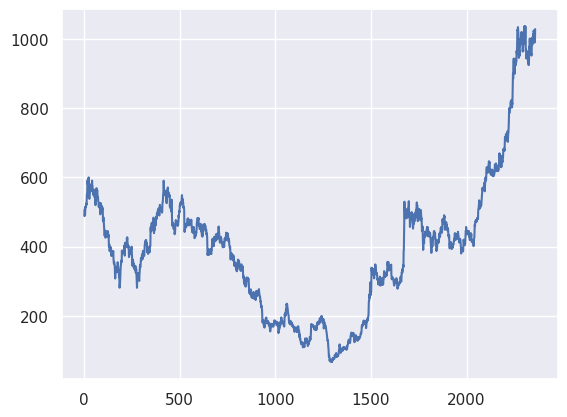

In [ ]:
data['Open'].plot()

The plot shows that the data is not stationary. And it also shows that the value is first decreasing then increasing.

Creating a new col called Time_stamp, this column is converted to index value.

In [ ]:
data['Time_Stamp'] = pd.DataFrame(data, columns=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0,2015-01-01
1,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,2015-01-02
2,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,2015-01-05
3,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0,2015-01-06
4,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395996,9232656.0,2015-01-07


In [ ]:
data_final_model = data.set_index('Time_Stamp')
data_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
2015-01-02,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
2015-01-07,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395996,9232656.0


In [ ]:
data_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2015-01-01 to 2024-07-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2359 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 147.4 KB


The col Time_stamp is converted to index so it will not show in the data info

### Decomposition to check dataset

Decomposition is used to check for any trend, seasonality and Residual(error) in the data.

Seasonality is short term and we consider it for the period of 12 months.

Trend and Seasonality can be predicted using the ARIMA and other models but Residual cannot be predicted as there are other factors(Government) which cannot be controlled by us.

Here we are checking for the Open col, but we can check for any col

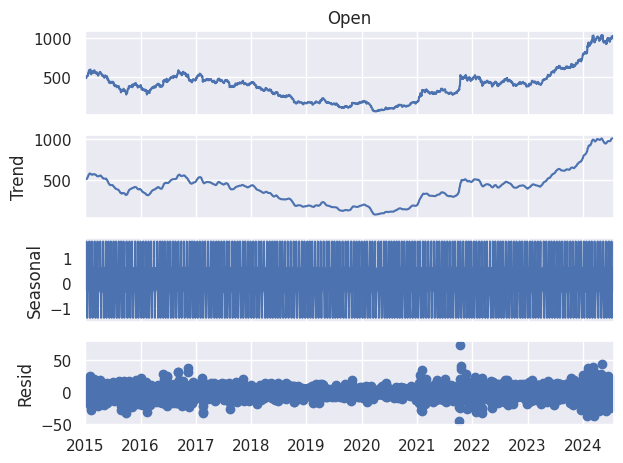

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data_final_model['Open'], period=12)
decompose.plot()
plt.show()

### Plot the box plot of the 'Open' variable with respect to the different years


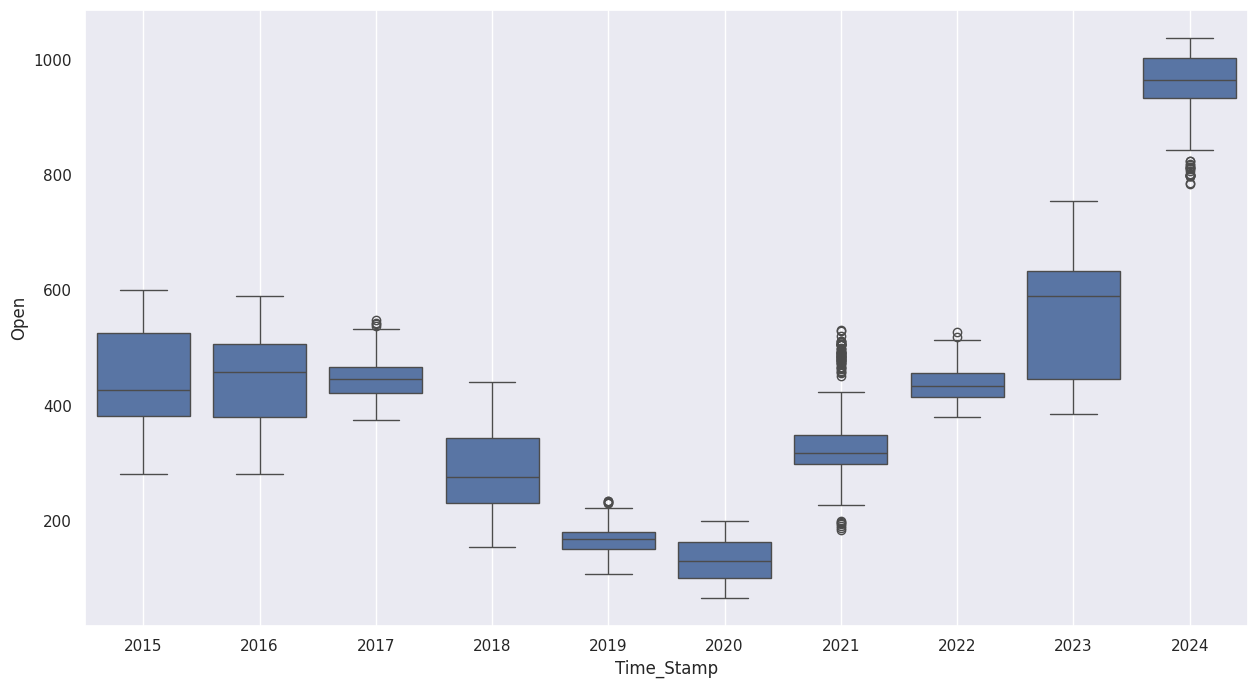

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=data_final_model.index.year, y=data_final_model['Open'])
plt.grid()

**Observing the trend based on year:**

The years that have outliers are the years which are more volatile and not preferred for trading as this can incure loss.

2023, 2016 are good years for selling the stocks as we can get more than avg profit.

In [ ]:
data_final_model.index.year

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Time_Stamp', length=2359)

Plotting the box plot month wise

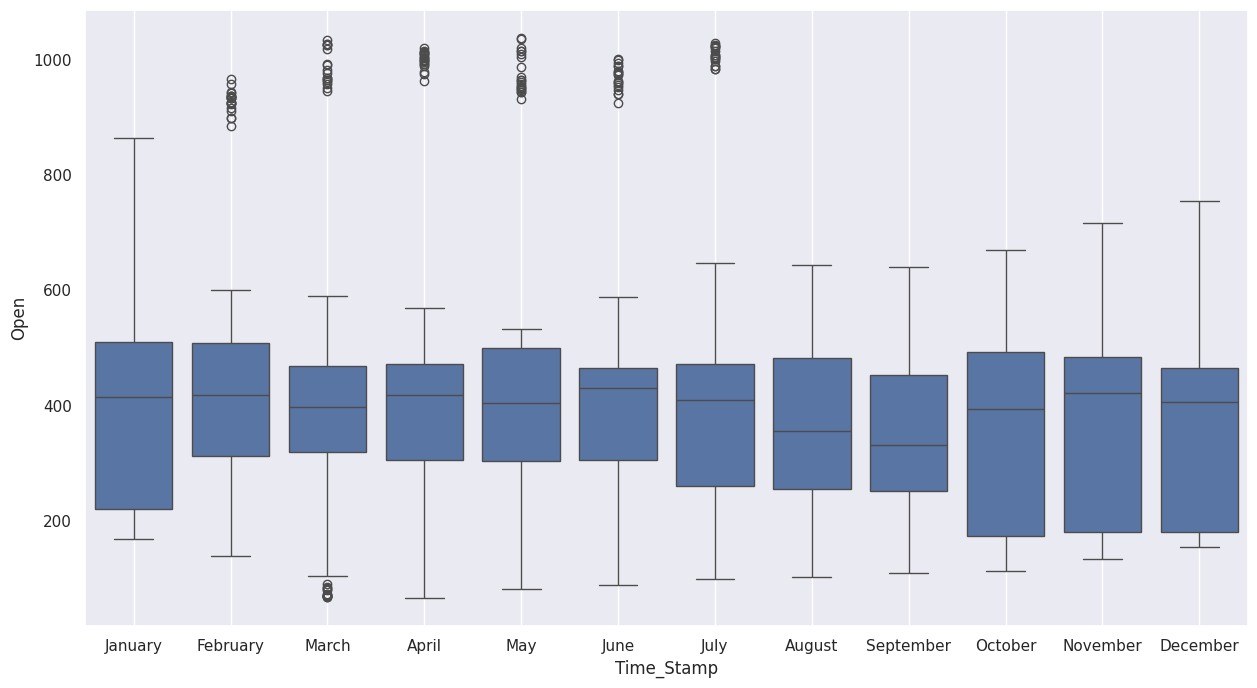

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=data_final_model.index.month_name(), y=data_final_model['Open'])
plt.grid()

**Observing the Seasonality month by month:**

Here Jan, Feb, Mar, April, are good to buy more stocks.

June, Oct, Nov, Dec are good for selling. Positive outliers are good for selling and gaining profit.

### Check if data is stationary using Augmented Dickey Fuller Test(ADF)

Its mandatory to check if data is stationary or not in Time series forcasting.

For Non stationary data we cannot predict the TSF.

ADF gives P-value. If p-value <= 0.05 then data is Stationary otherwise its not stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(data_final_model['Open'])

(1.0676630492285302,
 0.9949309676406137,
 0,
 2358,
 {'1%': -3.4331262650681884,
  '5%': -2.8627665066966537,
  '10%': -2.5674229225037246},
 16929.732322310592)

The output of adfuller is not interpretable to we are writing a function to understand the output better.

In [ ]:
def check_adftest(timeseries):
  result = adfuller(timeseries)
  print("Augmented Dickey Fuller Test - To check data us Stationary or not")
  labels = ['ADF Stats', 'P-Values', 'Lags', 'No of observation']
  for i, j in zip(result, labels):
    print(j + " :-> "+str(i))

  if result[1] <= 0.05: # the result[1] represents p-value
    print("Strong evidence against null hypothesis and my time series is Stationary")
  else:
    print("Weak evidence against null hypothesis and my time series is Non Stationary")

In [ ]:
check_adftest(data_final_model['Open'])

Augmented Dickey Fuller Test - To check data us Stationary or not
ADF Stats :-> 1.0676630492285302
P-Values :-> 0.9949309676406137
Lags :-> 0
No of observation :-> 2358
Weak evidence against null hypothesis and my time series is Non Stationary


Here it shows that p-value is greater than 0.05 so data is non stationary.

In [ ]:
data_final_model_stationary = data_final_model.copy()

### Split the data into train and test

Here the train and test split is not done randomly, it is done sequentially. So, we take the start and end dates of the stock and use that to split the data.

In [ ]:
start_date = data_final_model.index.min()
end_date = data_final_model.index.max()
print("Start Date of Stock which we have taken : ", start_date)
print("End date of the Stock which we have taken : ", end_date)

Start Date of Stock which we have taken :  2015-01-01 00:00:00
End date of the Stock which we have taken :  2024-07-25 00:00:00


In [ ]:
data_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0
2015-01-02,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0
2015-01-07,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395996,9232656.0


We are considering 2022-02-02 date to split the data. All the data less than 2022-02-02 will be train data and all the data greater than 2022-02-02 will be test data.

In [ ]:
train = data_final_model[pd.to_datetime(data_final_model.index) < pd.to_datetime('2022-02-02')]
test = data_final_model[pd.to_datetime(data_final_model.index) >= pd.to_datetime('2022-02-02')]

In [ ]:
train.shape, test.shape

((1749, 7), (610, 7))

As we want to predict the Open col value, we will take the Open col for train_final and test_final

In [ ]:
train_final = train[['Open']]
test_final = test[['Open']]

In [ ]:
check_adftest(train_final['Open'])

Augmented Dickey Fuller Test - To check data us Stationary or not
ADF Stats :-> -1.5074956883684854
P-Values :-> 0.5298001239166736
Lags :-> 12
No of observation :-> 1736
Weak evidence against null hypothesis and my time series is Non Stationary


In [ ]:
check_adftest(test_final['Open'])

Augmented Dickey Fuller Test - To check data us Stationary or not
ADF Stats :-> 1.1914276645989952
P-Values :-> 0.9959261180257812
Lags :-> 7
No of observation :-> 602
Weak evidence against null hypothesis and my time series is Non Stationary


In both train_final and test_final, the adfuller test shows that the data is non stationary. To handle this we are taking the first difference of the Open col data by shifting the data by 1

# Making the Data stationary by first difference

In [ ]:
data_final_model_stationary['First_diff'] = data_final_model_stationary['Open'] - data_final_model_stationary['Open'].shift(1)
data_final_model_stationary.head()

,Date,Open,High,Low,Close,Adj Close,Volume,1st Diff,First_diff
Time_Stamp,,,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551.0,NaN,NaN
2015-01-02,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,2.720794,2.720794
2015-01-05,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,12.713654,12.713654
2015-01-06,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816742,7979598.0,4.204895,4.204895
2015-01-07,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395996,9232656.0,-19.144653,-19.144653


In [ ]:
check_adftest(data_final_model_stationary['First_diff'].dropna()) # dropna is used to drop the first row as it has NaN

Augmented Dickey Fuller Test - To check data us Stationary or not
ADF Stats :-> -47.7237533748981
P-Values :-> 0.0
Lags :-> 0
No of observation :-> 2357
Strong evidence against null hypothesis and my time series is Stationary


Now after first difference, it shows that data is Stationary.

Now splitting the data again using start date and end date.

In [ ]:
# split the data into train and test
start_date_stat = data_final_model_stationary.index.min()
end_date_stat = data_final_model_stationary.index.max()
print("Start Date of Stock  :", start_date_stat)
print("End Data of the Stock :", end_date_stat)

Start Date of Stock  : 2015-01-01 00:00:00
End Data of the Stock : 2024-07-25 00:00:00


In [ ]:
train_stationary = data_final_model_stationary[pd.to_datetime(data_final_model_stationary['Date']) < pd.to_datetime('2022-02-02')]
test_stationary = data_final_model_stationary[pd.to_datetime(data_final_model_stationary['Date']) >= pd.to_datetime('2022-02-02')]

In [ ]:
train_stationary.shape, test_stationary.shape

((1749, 9), (610, 9))

In [ ]:
train_stationary_final = train_stationary[['First_diff']]
test_stationary_final = test_stationary[['First_diff']]

In [ ]:
train_stationary_final

,First_diff
Time_Stamp,
2015-01-01,NaN
2015-01-02,2.720794
2015-01-05,12.713654
2015-01-06,4.204895
2015-01-07,-19.144653
...,...
2022-01-25,-25.900024
2022-01-27,6.950012
2022-01-28,19.750000


In [ ]:
test_stationary_final

,First_diff
Time_Stamp,
2022-02-02,0.600006
2022-02-03,0.500000
2022-02-04,-5.300018
2022-02-07,-0.899994
2022-02-08,-4.899994
...,...
2024-07-19,1.049988
2024-07-22,-34.000000
2024-07-23,17.900024


In [ ]:
check_adftest(train_stationary_final['First_diff'].dropna())

Augmented Dickey Fuller Test - To check data us Stationary or not
ADF Stats :-> -10.840199450165988
P-Values :-> 1.623271892290466e-19
Lags :-> 11
No of observation :-> 1736
Strong evidence against null hypothesis and my time series is Stationary


In [ ]:
check_adftest(test_stationary_final['First_diff'].dropna())

Augmented Dickey Fuller Test - To check data us Stationary or not
ADF Stats :-> -10.449660648780348
P-Values :-> 1.4492848507079626e-18
Lags :-> 6
No of observation :-> 603
Strong evidence against null hypothesis and my time series is Stationary


Now, both the train and test data are showing as Stationary.